In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [422]:
comp_result = pd.read_csv('RegularSeasonCompactResults.csv')
seed = pd.read_csv('NCAATourneySeeds.csv')

In [254]:
comp_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150684 entries, 0 to 150683
Data columns (total 8 columns):
Season     150684 non-null int64
DayNum     150684 non-null int64
WTeamID    150684 non-null int64
WScore     150684 non-null int64
LTeamID    150684 non-null int64
LScore     150684 non-null int64
WLoc       150684 non-null object
NumOT      150684 non-null int64
dtypes: int64(7), object(1)
memory usage: 9.2+ MB


In [255]:
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 3 columns):
Season    2150 non-null int64
Seed      2150 non-null object
TeamID    2150 non-null int64
dtypes: int64(2), object(1)
memory usage: 50.5+ KB


In [423]:
#seed['Rank'] = seed.Seed.str[1:3]
#seed.drop(['Seed'],axis=1,inplace=True)
comp_result['TeamID']=comp_result['WTeamID']
comp_result.drop(['WTeamID'],axis=1,inplace=True)

In [424]:
#merge seed and comp_result is to filter out winning teams who couldn't make it to the tourney and gotten assigned with SEED
merge = pd.merge(seed,comp_result, on=['Season','TeamID'])

In [345]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47327 entries, 0 to 47326
Data columns (total 9 columns):
Season     47327 non-null int64
Seed       47327 non-null object
TeamID     47327 non-null int64
DayNum     47327 non-null int64
WScore     47327 non-null int64
LTeamID    47327 non-null int64
LScore     47327 non-null int64
WLoc       47327 non-null object
NumOT      47327 non-null int64
dtypes: int64(7), object(2)
memory usage: 3.6+ MB


In [259]:
merge.head()

,Season,Seed,TeamID,DayNum,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,W01,1207,40,82,1424,46,H,0
1,1985,W01,1207,44,86,1110,64,H,0
2,1985,W01,1207,47,77,1177,57,H,0
3,1985,W01,1207,51,89,1288,62,H,0
4,1985,W01,1207,54,69,1307,61,A,0


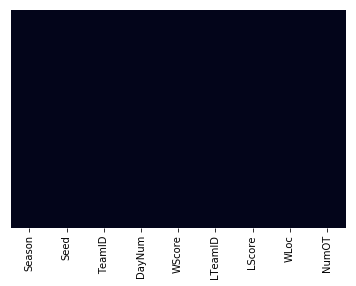

In [260]:
sns.heatmap(merge.isnull(),yticklabels=False,cbar=False)


In [425]:
#another merge to get seed#for the losing Team and name it'Rank'
seed['LTeamID']=seed['TeamID']
seed['Rank'] = seed.Seed.str[1:3]
seed['Division']=seed.Seed.str[0:1]
seed.drop(['Seed','TeamID'],axis=1,inplace=True)
merge = pd.merge(seed,merge, on=['Season','LTeamID'])

In [426]:
merge['Seed']= merge.Seed.str[1:3]

In [168]:
#I make each unique instance teamID + rival's  
#merge['TeamID+Rank']=merge['TeamID'].map(str)+'-'+merge['Rank'].map(str)

In [101]:
#merge.head(10)
#merge['Win']="Y"

#win = pd.get_dummies(merge['Win'],drop_first=True)
#merge = pd.concat([merge,win],axis=1)
#merge.drop(['Win'],axis=1,inplace=True)

#win

In [427]:
merge['win_by']=merge[['WScore']].sub(merge['LScore'], axis=0)
merge['Seed'] = merge.Seed.astype(int)
merge['Rank'] = merge.Rank.astype(int)
merge['seed_dif']=merge[['Seed']].sub(merge['Rank'], axis=0)
#instead of using 
#merge['seed_df']=merge

In [428]:

Division = pd.get_dummies(merge['Division'],drop_first=True)
#Win = pd.get_dummies(merge['Win'],drop_first=True)
#LTeamID = pd.get_dummies(merge['LTeamID'],drop_first=True)
#TeamID = pd.get_dummies(merge['TeamID'],drop_first=True)
#Rank = pd.get_dummies(merge['Rank'],drop_first=True)
#Seed = pd.get_dummies(merge['Seed'],drop_first=True)
WLoc = pd.get_dummies(merge['WLoc'],drop_first=True)
merge.drop(['Division','LTeamID','TeamID','WLoc','LTeamID','TeamID','Season','WScore','LScore'],axis=1,inplace=True)
merge = pd.concat([merge,Division,WLoc],axis=1)


In [357]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9144 entries, 0 to 9143
Data columns (total 11 columns):
Rank        9144 non-null int64
Seed        9144 non-null int64
DayNum      9144 non-null int64
NumOT       9144 non-null int64
win_by      9144 non-null int64
seed_dif    9144 non-null int64
X           9144 non-null uint8
Y           9144 non-null uint8
Z           9144 non-null uint8
H           9144 non-null uint8
N           9144 non-null uint8
dtypes: int64(6), uint8(5)
memory usage: 864.7 KB


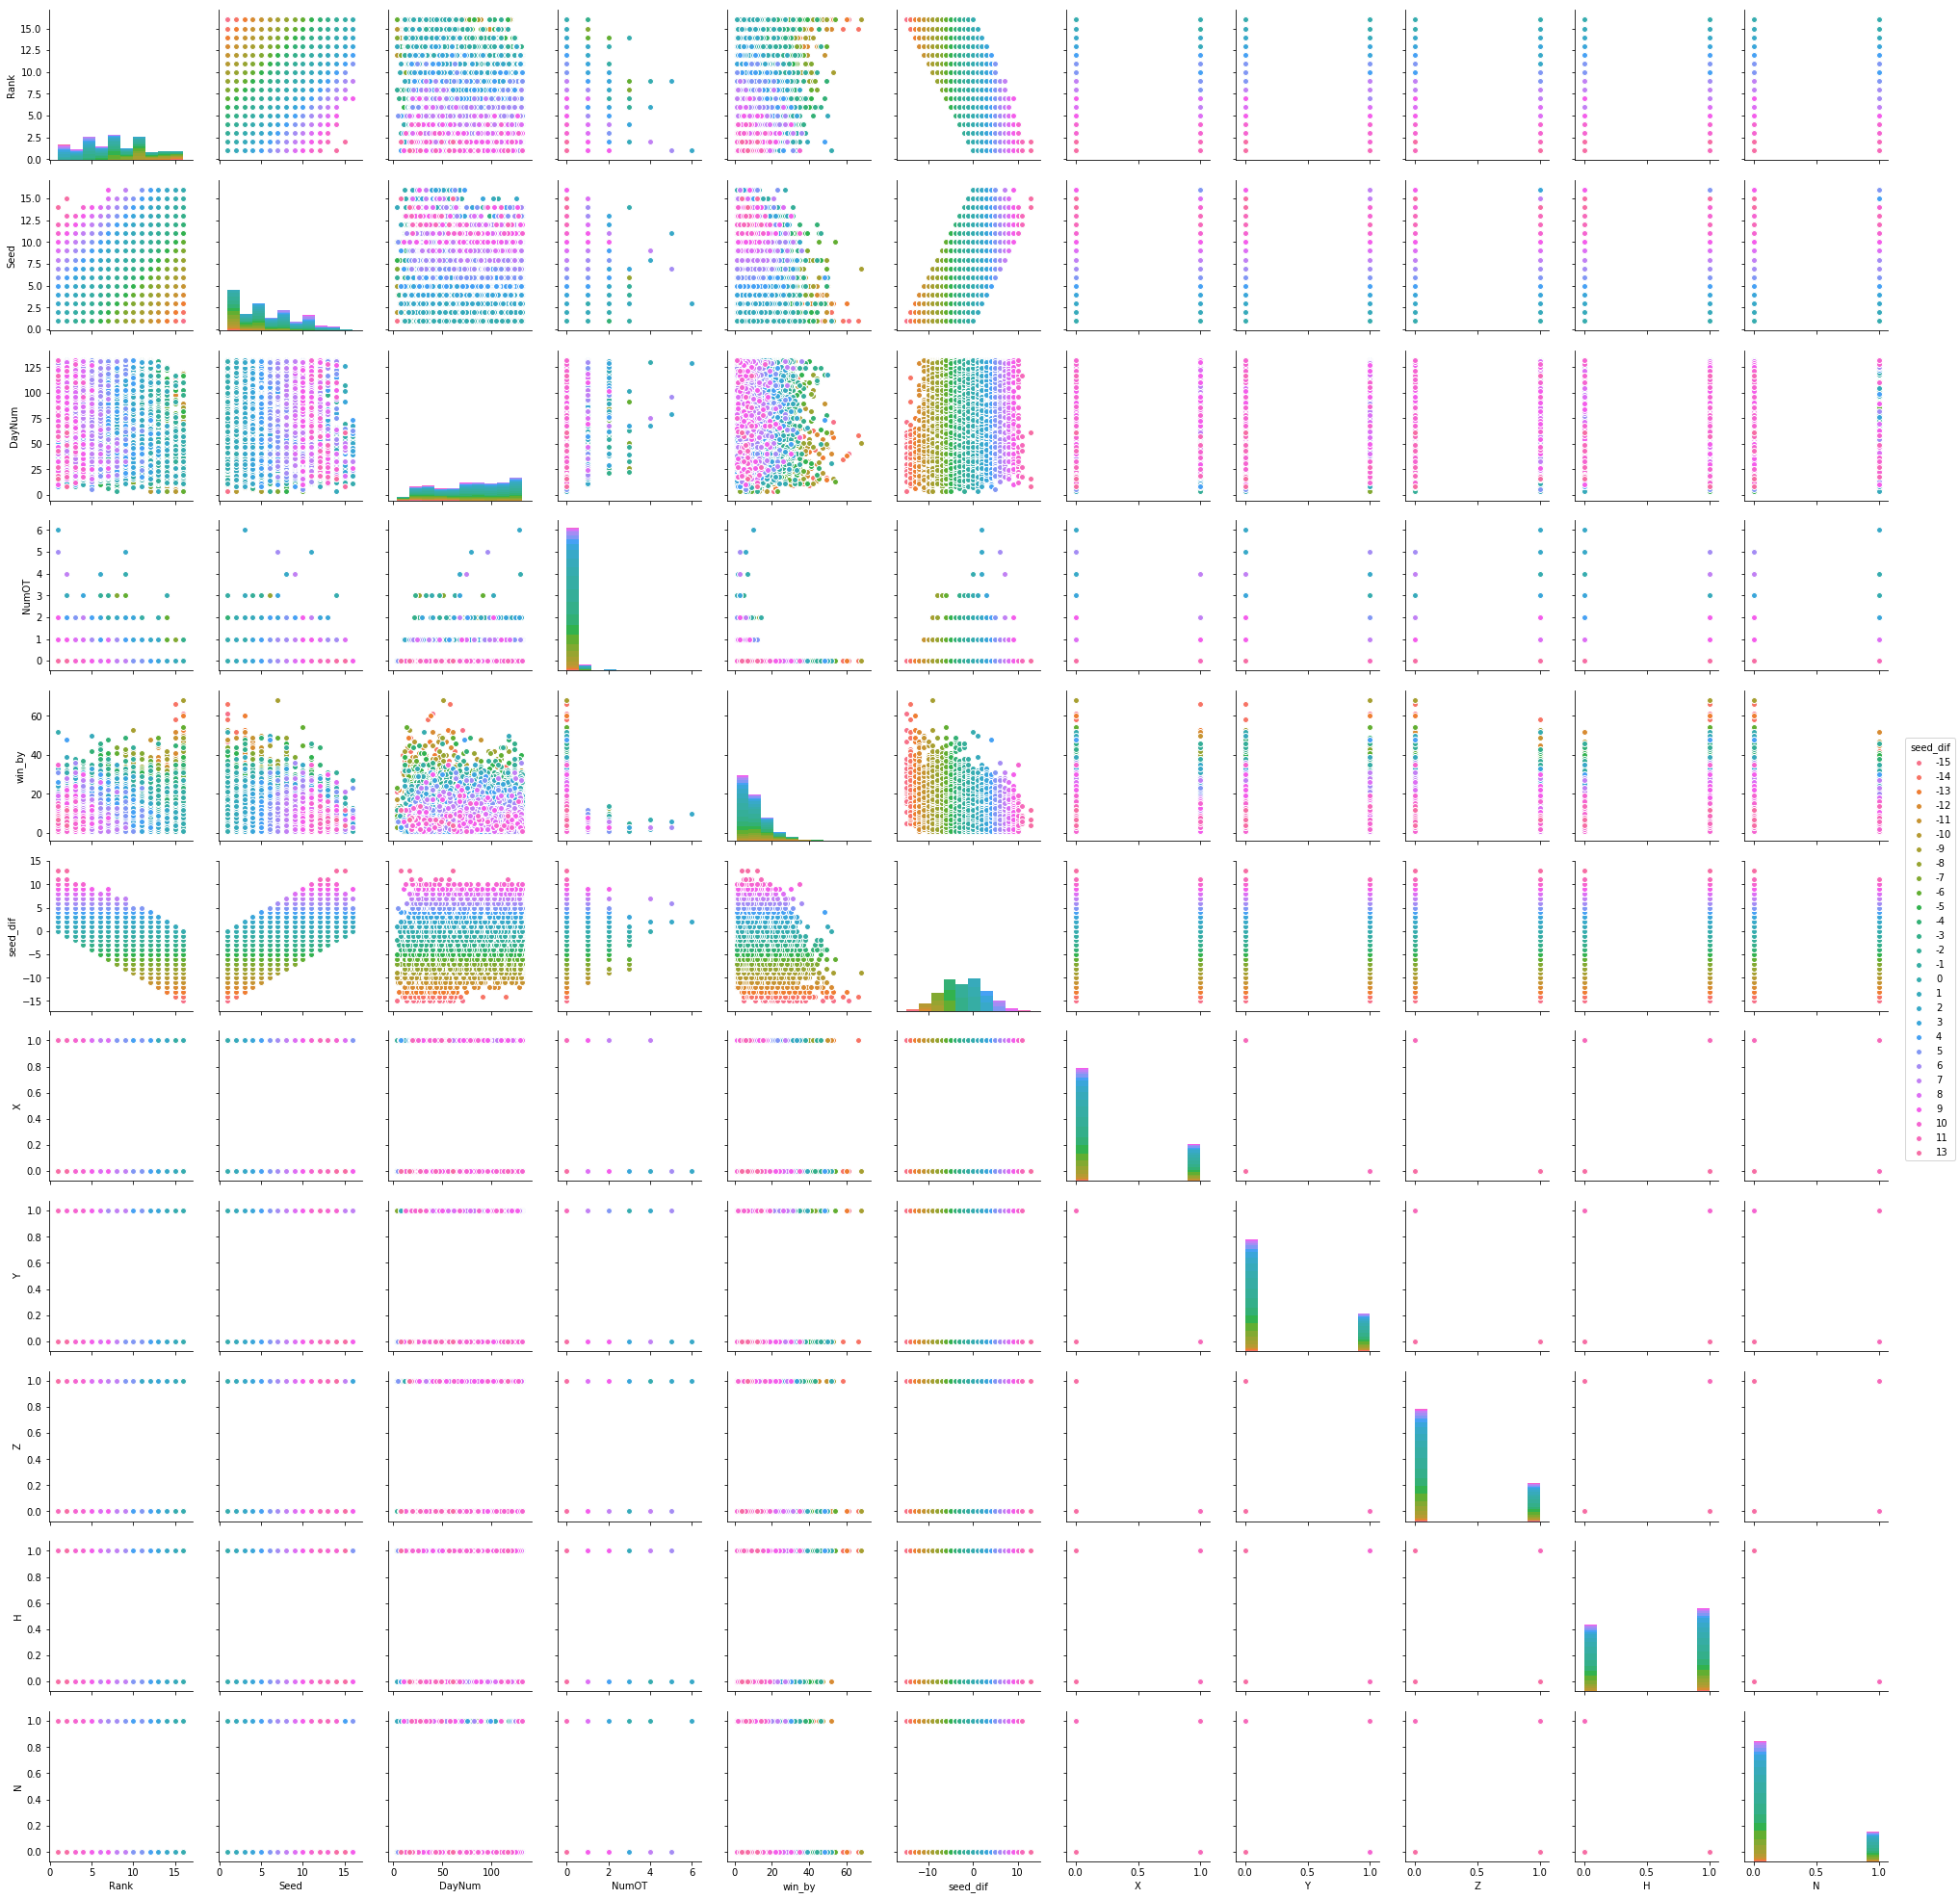

In [402]:
sns.pairplot(merge,hue='seed_dif')

In [457]:
X = merge.drop(['win_by','Seed','Rank'], axis=1)
#X = merge[['seed_dif']]
y = merge[['win_by']]

In [458]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [459]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [460]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.01108584 -3.23021353 -0.4946934   0.15965546  0.32863519  0.40817109
   4.00161147  1.98783055]]


In [465]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

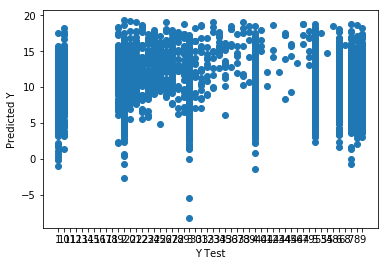

In [466]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [463]:
regression_model.score(X_test, y_test)

NameError: name 'regression_model' is not defined

In [467]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 5.73124297975
MSE: 55.8006751051


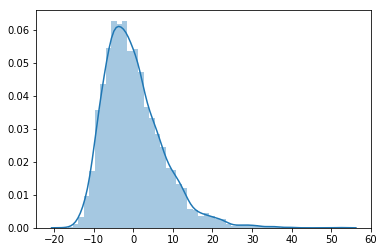

In [468]:
sns.distplot((y_test-predictions),bins=50);

In [469]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

The coefficient for DayNum is -0.011085840187551281
The coefficient for NumOT is -3.2302135329950445
The coefficient for seed_dif is -0.49469340234857456
The coefficient for X is 0.15965545590694888
The coefficient for Y is 0.3286351877994974
The coefficient for Z is 0.40817109021376935
The coefficient for H is 4.0016114681617
The coefficient for N is 1.987830553257011


In [119]:
#assign x, y; name can be dropped bc it is not meaningful 
#X = merge.drop(['','name'], axis=1)
#y = mpg[['mpg']]

In [171]:
#from sklearn.model_selection import train_test_split

In [203]:
#X_train, X_test, y_train, y_test = train_test_split(merge.drop(['Win','Season','LTeamID'],axis=1), 
  #                                                  merge['Win'], test_size=0.25, 
  #                                                  random_state=101)

IndentationError: unexpected indent (<ipython-input-203-5a28b24b5a6b>, line 2)

In [154]:
#from sklearn.linear_model import LogisticRegression

In [155]:
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: '1281-11'